In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
data_path = "/content/parkinsons.data"
data = pd.read_csv(data_path)

In [3]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
# Check for missing values
print(data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [5]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['name', 'status'])
y = data['status']


In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))


In [8]:
# Initialize models
models = {
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [9]:
# Train and evaluate each model
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)



Support Vector Machine Results:
Accuracy: 89.74%
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


K-Nearest Neighbors Results:
Accuracy: 94.87%
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Naive Bayes Results:
Accuracy: 71.79%
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72   

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


In [12]:
data_path = "/content/parkinsons.data"
data = pd.read_csv(data_path)


In [13]:
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['name', 'status'])
y = data['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    if roc_auc:
        print(f"ROC-AUC Score: {roc_auc:.2f}")
    print(classification_report(y_test, y_test_pred))
    return train_accuracy, test_accuracy, roc_auc


In [16]:
# Initialize models
models = {
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}


In [17]:
# Train and evaluate each model
train_accuracies = []
test_accuracies = []
roc_aucs = []
model_names = []

In [18]:
for model_name, model in models.items():
    train_acc, test_acc, roc_auc = train_and_evaluate_model(model, model_name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    roc_aucs.append(roc_auc)
    model_names.append(model_name)



Support Vector Machine Results:
Training Accuracy: 89.10%
Testing Accuracy: 89.74%
ROC-AUC Score: 0.85
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


K-Nearest Neighbors Results:
Training Accuracy: 94.87%
Testing Accuracy: 94.87%
ROC-AUC Score: 0.98
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Naive Bayes Results:
Training Accuracy: 69.87%
Testing Accuracy: 71.79%
ROC-AUC Score: 0.77
              precision    recall  f1-score   su

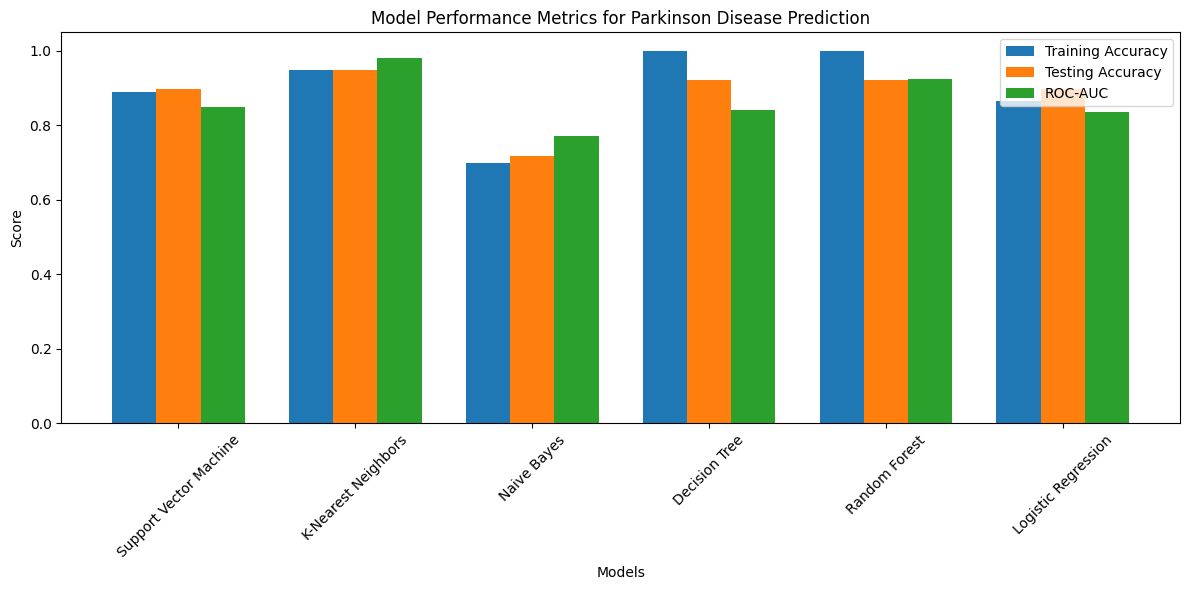

In [19]:
# Visualization of results
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')
plt.bar(index + 2 * bar_width, [auc if auc else 0 for auc in roc_aucs], bar_width, label='ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics for Parkinson Disease Prediction')
plt.xticks(index + bar_width, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Create a final prediction model using VotingClassifier
final_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression())
    ],
    voting='soft'
)

final_model.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [21]:
# Function to make predictions for new inputs
def predict_parkinson(features):
    features_scaled = scaler.transform([features])
    prediction = final_model.predict(features_scaled)
    probability = final_model.predict_proba(features_scaled)
    result = "Parkinson's Disease Detected" if prediction[0] == 1 else "No Parkinson's Disease"
    print(f"Prediction: {result}")
    print(f"Probability: {probability[0]}")
    return result, probability


In [71]:
# Example usage of the final model
example_input = X.iloc[4].values
predict_parkinson(example_input)
#here the ["No Parkinson's Disease %", "Parkinson's Disease %"]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


("Parkinson's Disease Detected", array([[0.0292182, 0.9707818]]))

# ***GUI Based work:***

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from tkinter import Tk, Label, Entry, Button, messagebox


In [25]:
# Load the dataset
data_path = "/content/parkinsons.data"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['name', 'status'])
y = data['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [26]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    if roc_auc:
        print(f"ROC-AUC Score: {roc_auc:.2f}")
    print(classification_report(y_test, y_test_pred))
    return train_accuracy, test_accuracy, roc_auc


In [27]:
# Initialize models
models = {
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
train_accuracies = []
test_accuracies = []
roc_aucs = []
model_names = []


In [28]:
for model_name, model in models.items():
    train_acc, test_acc, roc_auc = train_and_evaluate_model(model, model_name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    roc_aucs.append(roc_auc)
    model_names.append(model_name)



Support Vector Machine Results:
Training Accuracy: 89.10%
Testing Accuracy: 89.74%
ROC-AUC Score: 0.85
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


K-Nearest Neighbors Results:
Training Accuracy: 94.87%
Testing Accuracy: 94.87%
ROC-AUC Score: 0.98
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Naive Bayes Results:
Training Accuracy: 69.87%
Testing Accuracy: 71.79%
ROC-AUC Score: 0.77
              precision    recall  f1-score   su

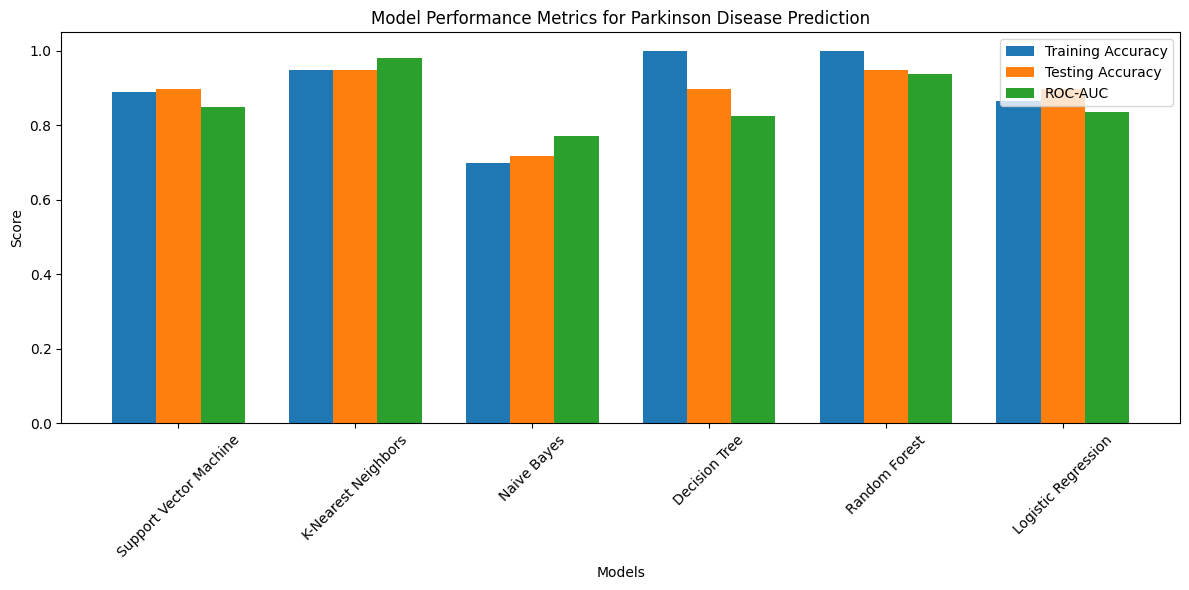

In [29]:
# Visualization of results
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')
plt.bar(index + 2 * bar_width, [auc if auc else 0 for auc in roc_aucs], bar_width, label='ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics for Parkinson Disease Prediction')
plt.xticks(index + bar_width, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

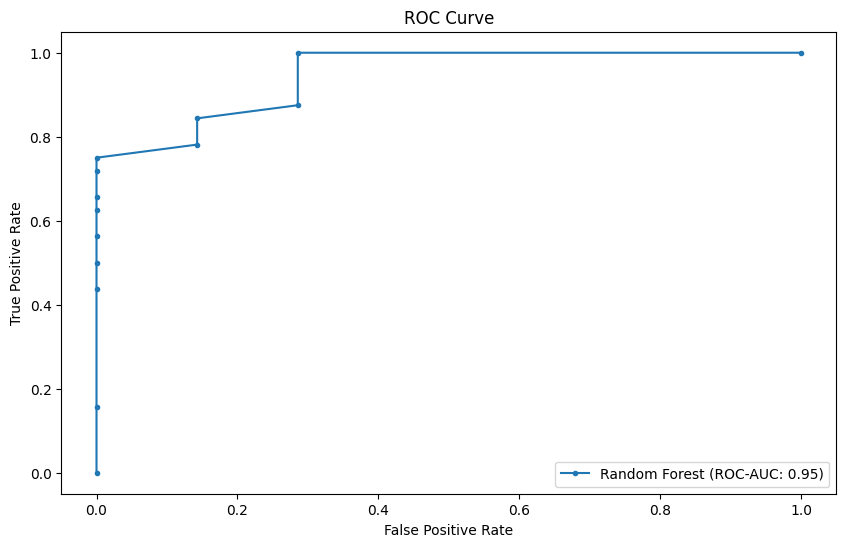

In [30]:
# Create an ROC curve for the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='Random Forest (ROC-AUC: {:.2f})'.format(roc_auc_score(y_test, probs)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
# Create a final prediction model using VotingClassifier
final_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression())
    ],
    voting='soft'
)

final_model.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [32]:
# Function to make predictions for new inputs
def predict_parkinson(features):
    features_scaled = scaler.transform([features])
    prediction = final_model.predict(features_scaled)
    probability = final_model.predict_proba(features_scaled)
    result = "Parkinson's Disease Detected" if prediction[0] == 1 else "No Parkinson's Disease"
    return result, probability


In [34]:
# Create a GUI for input
def create_gui():
    def on_submit():
        try:
            inputs = [float(entry.get()) for entry in input_entries]
            result, probability = predict_parkinson(inputs)
            messagebox.showinfo("Prediction Result", f"{result}\nProbability: {probability[0]}")
        except ValueError:
            messagebox.showerror("Input Error", "Please enter valid numeric values for all fields.")

    root = Tk()
    root.title("Parkinson's Disease Predictor")

    Label(root, text="Enter the following values:").grid(row=0, column=0, columnspan=2)

    input_entries = []
    for i, col in enumerate(X.columns):
        Label(root, text=f"{col} (min: {data[col].min()}, max: {data[col].max()}):").grid(row=i+1, column=0, sticky='w')
        entry = Entry(root)
        entry.grid(row=i+1, column=1)
        input_entries.append(entry)

    Button(root, text="Predict", command=on_submit).grid(row=len(X.columns)+1, column=0, columnspan=2)

    root.mainloop()

In [35]:
# Run the GUI
create_gui()


TclError: no display name and no $DISPLAY environment variable

# ***CLI Based:***



In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [37]:
# Load the dataset
data_path = "/content/parkinsons.data"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['name', 'status'])
y = data['status']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<ipython-input-38-6199cee3f2c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


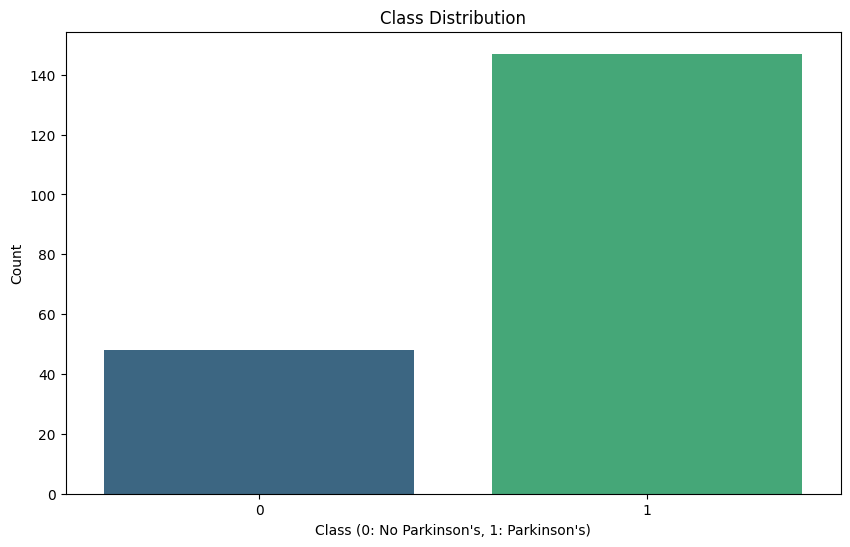

In [38]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.title("Class Distribution")
sns.countplot(x=y, palette="viridis")
plt.xlabel("Class (0: No Parkinson's, 1: Parkinson's)")
plt.ylabel("Count")
plt.show()


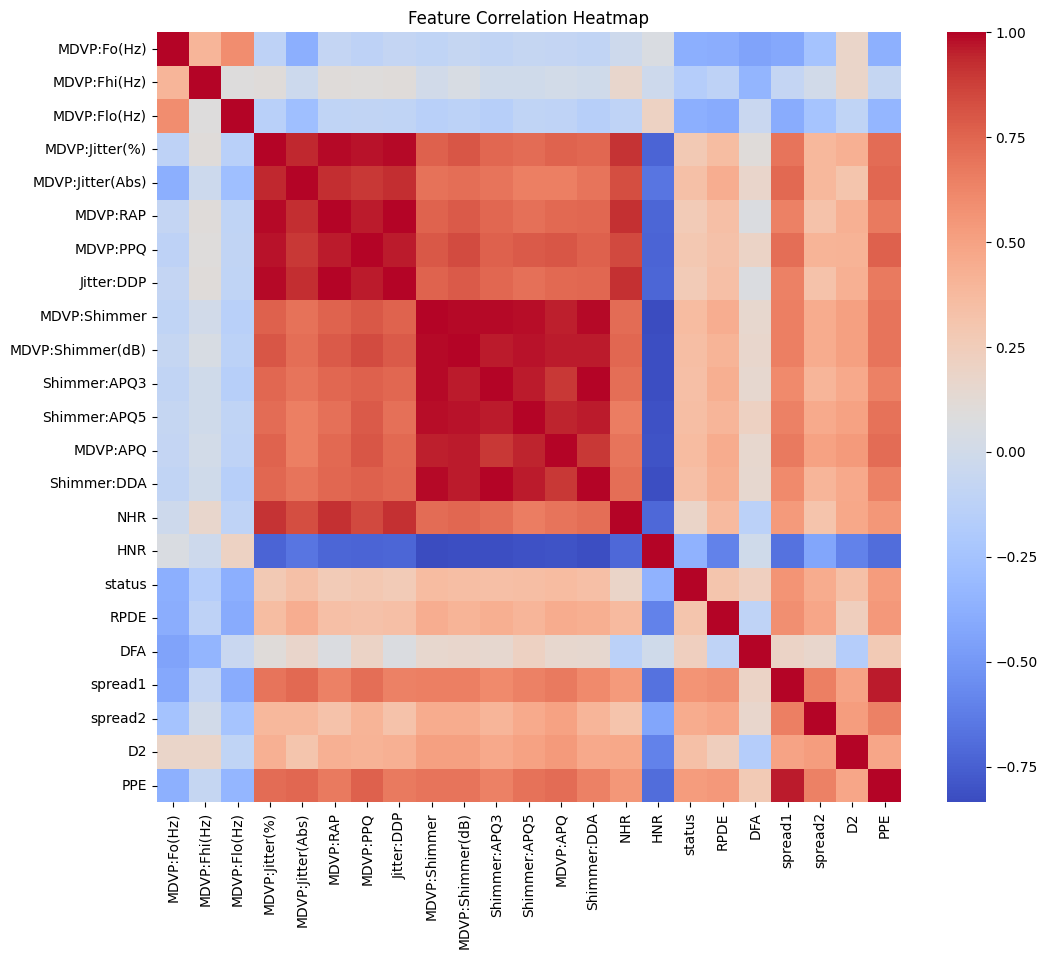

In [41]:
# Correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Feature Correlation Heatmap")
correlation_matrix = data.drop(columns=['name']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [43]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [44]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    if roc_auc:
        print(f"ROC-AUC Score: {roc_auc:.2f}")
    print(classification_report(y_test, y_test_pred))
    return train_accuracy, test_accuracy, roc_auc


In [45]:
# Initialize models
models = {
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [46]:
# Train and evaluate each model
train_accuracies = []
test_accuracies = []
roc_aucs = []
model_names = []

In [47]:
for model_name, model in models.items():
    train_acc, test_acc, roc_auc = train_and_evaluate_model(model, model_name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    roc_aucs.append(roc_auc)
    model_names.append(model_name)



Support Vector Machine Results:
Training Accuracy: 89.10%
Testing Accuracy: 89.74%
ROC-AUC Score: 0.85
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


K-Nearest Neighbors Results:
Training Accuracy: 94.87%
Testing Accuracy: 94.87%
ROC-AUC Score: 0.98
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Naive Bayes Results:
Training Accuracy: 69.87%
Testing Accuracy: 71.79%
ROC-AUC Score: 0.77
              precision    recall  f1-score   su

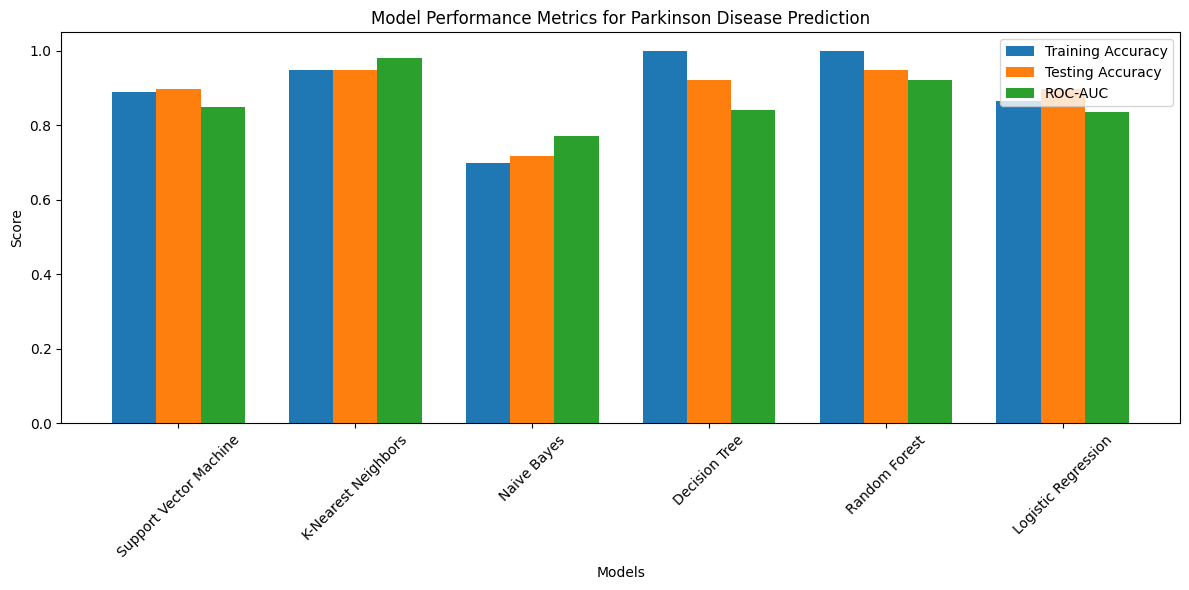

In [48]:
# Visualization of results
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')
plt.bar(index + 2 * bar_width, [auc if auc else 0 for auc in roc_aucs], bar_width, label='ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics for Parkinson Disease Prediction')
plt.xticks(index + bar_width, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

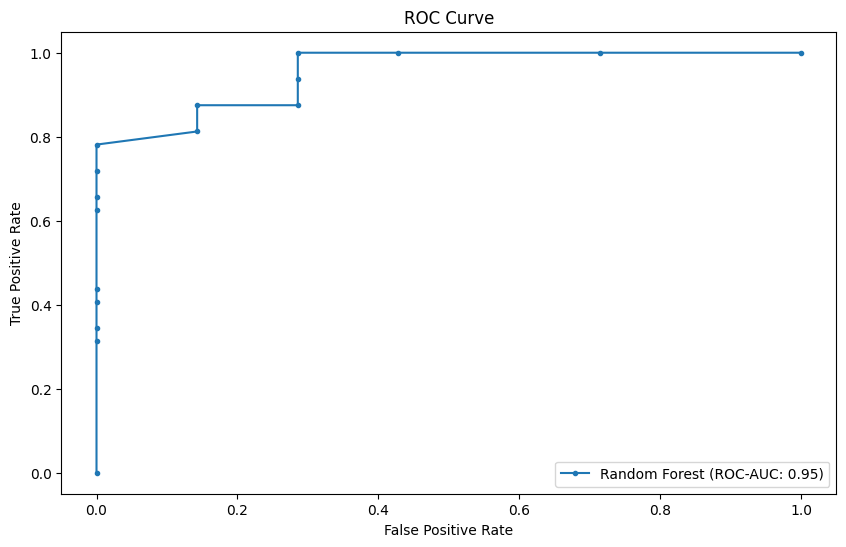

In [49]:
# Create an ROC curve for the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='Random Forest (ROC-AUC: {:.2f})'.format(roc_auc_score(y_test, probs)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [50]:
# Create a final prediction model using VotingClassifier
final_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression())
    ],
    voting='soft'
)

final_model.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [62]:
# CLI Input for prediction
def predict_parkinson_cli():
    import builtins
    original_input = builtins.input  # Backup original input function

    print("\n--- Parkinson's Disease Prediction ---")
    print("Enter the following values for prediction:")

    inputs_value = []  # Ensure no conflict with built-in functions
    for col in X.columns:
        while True:
            try:
                # Use the built-in input function explicitly
                user_input = original_input(f"{col} (min: {data[col].min()}, max: {data[col].max()}): ")
                value = float(user_input)
                if data[col].min() <= value <= data[col].max():
                    inputs_value.append(value)
                    break
                else:
                    print(f"Please enter a value within the range: {data[col].min()} - {data[col].max()}")
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

    features_scaled = scaler.transform([inputs_value])
    prediction = final_model.predict(features_scaled)
    probability = final_model.predict_proba(features_scaled)
    result = "Parkinson's Disease Detected" if prediction[0] == 1 else "No Parkinson's Disease"
    print(f"\nPrediction: {result}")
    print(f"Probability: {probability[0]}")

In [63]:
# Run the CLI input
predict_parkinson_cli()
#here the ["No Parkinson's Disease %", "Parkinson's Disease %"]


--- Parkinson's Disease Prediction ---
Enter the following values for prediction:
MDVP:Fo(Hz) (min: 88.333, max: 260.105): 99
MDVP:Fhi(Hz) (min: 102.145, max: 592.03): 110
MDVP:Flo(Hz) (min: 65.476, max: 239.17): 596
Please enter a value within the range: 65.476 - 239.17
MDVP:Flo(Hz) (min: 65.476, max: 239.17): 150
MDVP:Jitter(%) (min: 0.00168, max: 0.03316): 0.04
Please enter a value within the range: 0.00168 - 0.03316
MDVP:Jitter(%) (min: 0.00168, max: 0.03316): 0.02
MDVP:Jitter(Abs) (min: 7e-06, max: 0.00026): 0.00015
MDVP:RAP (min: 0.00068, max: 0.02144): 0.015
MDVP:PPQ (min: 0.00092, max: 0.01958): 0.018
Jitter:DDP (min: 0.00204, max: 0.06433): 0.054
MDVP:Shimmer (min: 0.00954, max: 0.11908): 0.9
Please enter a value within the range: 0.00954 - 0.11908
MDVP:Shimmer (min: 0.00954, max: 0.11908): 0.10
MDVP:Shimmer(dB) (min: 0.085, max: 1.302): 1
Shimmer:APQ3 (min: 0.00455, max: 0.05647): 0.04
Shimmer:APQ5 (min: 0.0057, max: 0.0794): 0.06
MDVP:APQ (min: 0.00719, max: 0.13778): 0.09


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
import pandas as pd

# Load the .data file into a DataFrame
# Replace 'your_dataset.data' with the actual path to your .data file
data_file_path = '/content/parkinsons.data'
# If your .data file has no header, you can specify column names
# For example: column_names = ['col1', 'col2', 'col3', ...]
# df = pd.read_csv(data_file_path, header=None, names=column_names)
df = pd.read_csv(data_file_path)

# Convert the DataFrame to JSON format
# You can specify the orientation (e.g., 'records', 'columns', etc.)
json_data = df.to_json(orient='records', lines=True)

# Save the JSON data to a file
json_file_path = 'output.json'  # Specify the output JSON file name
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"Data successfully converted to JSON and saved to {json_file_path}")

Data successfully converted to JSON and saved to output.json
